In [1]:
import Diffusion_1D
import numpy as np
import matplotlib.pyplot as plt


In [26]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

from dataset import AirfoilDataset

def plot_airfoils(airfoil_x, airfoil_y):
    '''
    plot airfoils: no need to modify 
    '''
    idx = 0
    fig, ax = plt.subplots(nrows=32, ncols=4, figsize=(15, 80))
    for row in ax:
        for col in row:
            col.scatter(airfoil_x, airfoil_y[idx, :], s=0.6, c='black')
            col.axis('off')
            col.axis('equal')
            idx += 1
    plt.show()

In [3]:
dataset = AirfoilDataset(path='cleaned_airfoils/')
airfoil_x = dataset.get_x()
y_coordinates = dataset.get_y()
airfoil_dim = airfoil_x.shape[0]
print("airfoil_dim: ",airfoil_dim)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)



airfoil_dim:  200


In [4]:
model = Diffusion_1D.Unet1D(
    dim=8,  # Adjust based on the complexity of your data
    channels=1,  # Single channel for y-coordinates
    dim_mults=(1, 2, 4, 8),  # Example configuration; adjust as necessary
    resnet_block_groups=1
)



In [5]:
diffusion_model = Diffusion_1D.GaussianDiffusion1D(
    model,
    timesteps=1000, 
    seq_length=200,
    objective='pred_noise'
)

In [8]:
trainer = Diffusion_1D.Trainer1D(
    diffusion_model=diffusion_model,
    dataset=dataset,
    train_batch_size=64,
    train_num_steps=10000,
)
trainer.train()

/home/reid/anaconda3/lib/python3.11/site-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(split_batches=True)
  warnings.warn(


  0%|          | 0/10000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

training complete


In [1]:
sampled_airfoils = diffusion_model.sample(32)
sampled_airfoils = sampled_airfoils.to('cpu')
plot_airfoils(airfoil_x, sampled_airfoils.squeeze().detach().numpy())


NameError: name 'diffusion_model' is not defined

# To generate airfoils from an already trained model

In [27]:
import torch
import Diffusion_1D
import numpy as np
import matplotlib.pyplot as plt

# Assuming the model class is defined somewhere in your script as `Unet1D`
# and the diffusion model class is defined as `GaussianDiffusion1D`

# Initialize your model architecture
model = Diffusion_1D.Unet1D(
    dim=8,
    channels=1,
    dim_mults=(1, 2, 4, 8),
    resnet_block_groups=1
)


# Initialize the diffusion model
diffusion_model = Diffusion_1D.GaussianDiffusion1D(
    model,
    timesteps=1000, 
    seq_length=200,
    objective='pred_noise'
)

# Load the trained parameters into your model
checkpoint = torch.load("/home/reid/Airfoil_Diffusion_Generator/results/model-10.pt")
print(checkpoint.keys())
# Assuming your model is an instance of Unet1D and checkpoint is loaded as shown

if 'model' in checkpoint:
    state_dict = {key.replace('model.', ''): value for key, value in checkpoint['model'].items()}
    model.load_state_dict(state_dict, strict=False)  # Set strict to False
else:
    model.load_state_dict(checkpoint, strict=False)  # Set strict to False

model.eval()

# If the model was trained with specific configurations or wrapped within another module, adjust accordingly

# Now the model is ready to generate data
# For example:
sampled_airfoils = diffusion_model.sample(128)


dict_keys(['step', 'model', 'opt', 'ema', 'scaler', 'version'])


sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

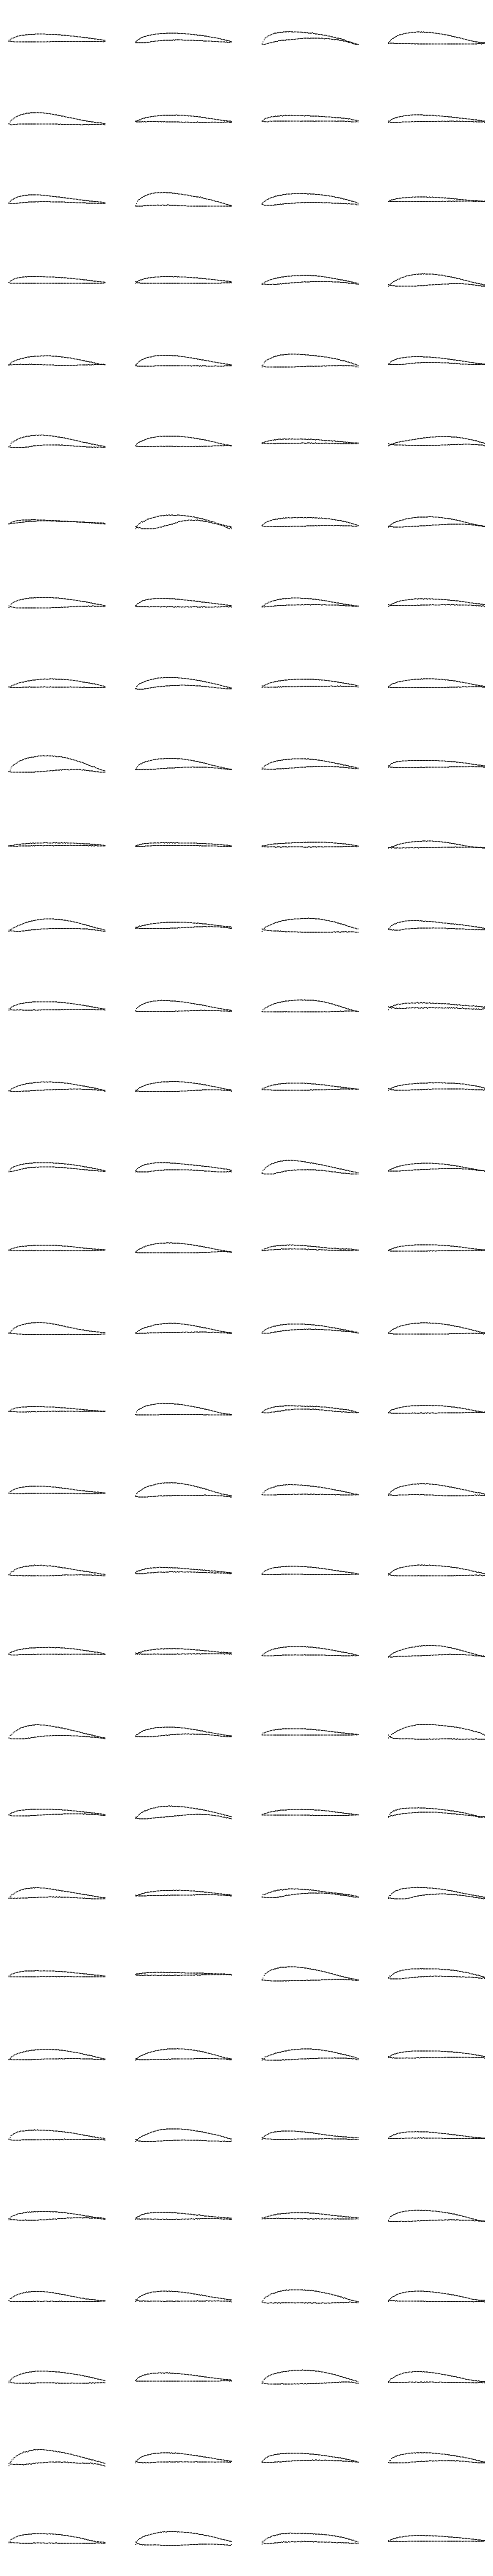

In [28]:
dataset = AirfoilDataset(path='cleaned_airfoils/')
airfoil_x = dataset.get_x()
plot_airfoils(airfoil_x, sampled_airfoils.squeeze().detach().numpy())

In [29]:
sampled_airfoils = sampled_airfoils.to('cpu')
airfoil_values = sampled_airfoils.squeeze().detach().numpy()
np.savetxt("sampled_airfoils.csv", airfoil_values, delimiter=",")